## Model Training

In [46]:
# import the libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.metrics import r2_score,root_mean_squared_error,mean_absolute_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.model_selection import GridSearchCV
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
import warnings



In [47]:
# import the dataset
studentData=pd.read_csv("StudentsPerformance.csv")

In [48]:
studentData.head(2)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88


In [49]:
# dropping the target column from whole dataset

X=studentData.drop(columns=["math score"],axis=1)
X.head(2)
X.shape

(1000, 7)

In [50]:
y=studentData["math score"]
y.head(2)

0    72
1    69
Name: math score, dtype: int64

In [51]:
# since there are categorical features so we need to do OHE,and scaling also

categoricalFeatures=X.select_dtypes(include="O").columns
numericalFeatures=X.select_dtypes(exclude="O").columns

from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.compose import ColumnTransformer

# creating column transformer for doing both task 

numericTransformer=StandardScaler()
oheTransformer=OneHotEncoder()

processor=ColumnTransformer([
    ("OneHotEncoder",oheTransformer,categoricalFeatures),
    ("standardScalar",numericTransformer,numericalFeatures)
])


In [52]:
# now giving the X in the processor

X=processor.fit_transform(X)

In [53]:
X.shape


(1000, 19)

In [54]:
# seperating the dataset for training and testing 

from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
X_train.shape,X_test.shape

((800, 19), (200, 19))

In [60]:
models = {
    "Linear Regression": LinearRegression(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "XGBRegressor": XGBRegressor(), 
    "CatBoosting Regressor": CatBoostRegressor(verbose=False),
}
modelList=[]
r2List=[]

for i in range(len(list(models))):
    model=list(models.values())[i]
    model.fit(X_train,y_train)
    
    y_train_pred=model.predict(X_train)
    y_test_pred=model.predict(X_test)
    
    #evaluation of model on training data
    maeTrain=mean_absolute_error(y_train,y_train_pred)
    r2Train=r2_score(y_train,y_train_pred)
    rmseTrain=root_mean_squared_error(y_train,y_train_pred)
    
    #evaluation of model on testing data
    maeTest=mean_absolute_error(y_test,y_test_pred)
    r2Test=r2_score(y_test,y_test_pred)
    rmseTest=root_mean_squared_error(y_test,y_test_pred)
    
    print(list(models.keys())[i])
    modelList.append(list(models.keys())[i])
    r2List.append(r2Test)
    
    print("Model Performance on Training data")
    print(f"Mean absolute Error : {maeTrain}" )
    print(f"r2 score: {r2Train}" )
    print(f"Root Mean Squared Error : {rmseTrain}" )
    
    print("----------------------------------------")
    
    print("Model Performance on Test data")
    print(f"Mean absolute Error : {maeTest}" )
    print(f"r2 score: {r2Test}" )
    print(f"Root Mean Squared Error : {rmseTest}" )
    
    
    
    


Linear Regression
Model Performance on Training data
Mean absolute Error : 4.266711846071957
r2 score: 0.8743172040139593
Root Mean Squared Error : 5.323050852720514
----------------------------------------
Model Performance on Test data
Mean absolute Error : 4.21476314247485
r2 score: 0.8804332983749565
Root Mean Squared Error : 5.393993869732843
K-Neighbors Regressor
Model Performance on Training data
Mean absolute Error : 4.516749999999999
r2 score: 0.8554978341651085
Root Mean Squared Error : 5.707683417990174
----------------------------------------
Model Performance on Test data
Mean absolute Error : 5.621
r2 score: 0.7838129945787431
Root Mean Squared Error : 7.253040741647602
Lasso
Model Performance on Training data
Mean absolute Error : 5.206302661246528
r2 score: 0.8071462015863455
Root Mean Squared Error : 6.593815587795568
----------------------------------------
Model Performance on Test data
Mean absolute Error : 5.157881810347764
r2 score: 0.8253197323627852
Root Mean Sq

In [61]:
BestModel=pd.DataFrame(list(zip(modelList,r2List)),columns=['Model Name', 'R2_Score']).sort_values(by=("R2_Score"),ascending=False)
BestModel

,Model Name,R2_Score
3,Ridge,0.880593
0,Linear Regression,0.880433
7,CatBoosting Regressor,0.851632
5,Random Forest Regressor,0.851149
6,XGBRegressor,0.827797
2,Lasso,0.825320
1,K-Neighbors Regressor,0.783813
4,Decision Tree,0.730684


#### by this we get to know that Ridge Regressor is performing more efficiently than that of other algorithms

In [62]:
model = LinearRegression(fit_intercept=True)
model = model.fit(X_train, y_train)
y_pred =model.predict(X_test)
score = r2_score(y_test, y_pred)*100
print(f" Accuracy of the model is {score}")

 Accuracy of the model is 88.04332983749565


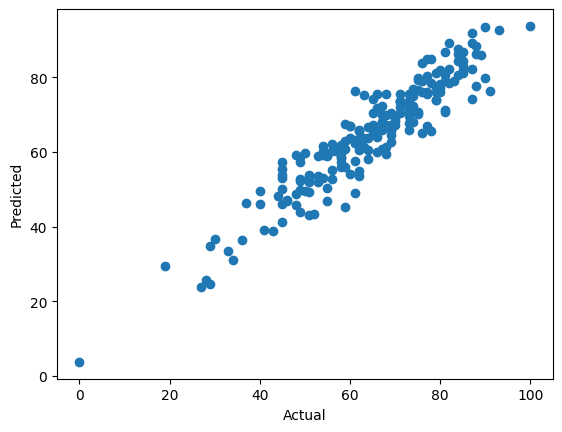

In [63]:
# plotting y_pred and y_test
plt.scatter(y_test,y_pred)
plt.xlabel('Actual');
plt.ylabel('Predicted');

<Axes: xlabel='math score'>

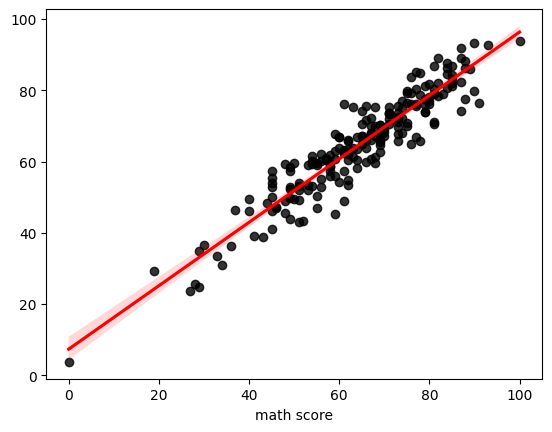

In [65]:
sns.regplot(x=y_test,y=y_pred,color="black",line_kws={"color": "red"})

##### difference between actual value and predicted value

In [68]:
pred_df=pd.DataFrame({'Actual Value':y_test,'Predicted Value':y_pred,'Difference':y_test-y_pred})
pred_df.sample(15)

,Actual Value,Predicted Value,Difference
977,62,65.668533,-3.668533
78,61,62.345132,-1.345132
938,85,86.718483,-1.718483
643,74,74.997156,-0.997156
995,88,88.250025,-0.250025
529,62,63.417628,-1.417628
764,60,66.931873,-6.931873
677,70,67.117524,2.882476
30,69,67.325457,1.674543
689,93,92.679843,0.320157
